### Dropping Constant Features Using VarianceThreshold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.feature_selection import VarianceThreshold

In [3]:
Var_thres = VarianceThreshold(threshold=0)

In [4]:
santander = pd.read_csv("./Santander.csv")

In [5]:
Var_thres.fit(santander)

VarianceThreshold(threshold=0)

In [6]:
sum(Var_thres.get_support())

337

In [7]:
constant_columns = [column for column in santander.columns if column not in santander.columns[Var_thres.get_support()]]

In [8]:
constant_columns

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [9]:
santander = santander.drop(constant_columns,axis=1)

In [10]:
santander.shape

(76020, 337)

### Using Correlation()

In [11]:
x = santander.drop(columns=['TARGET'],axis=1)
y = santander['TARGET']

### We will eleminate the higher correlated parameters

<AxesSubplot:>

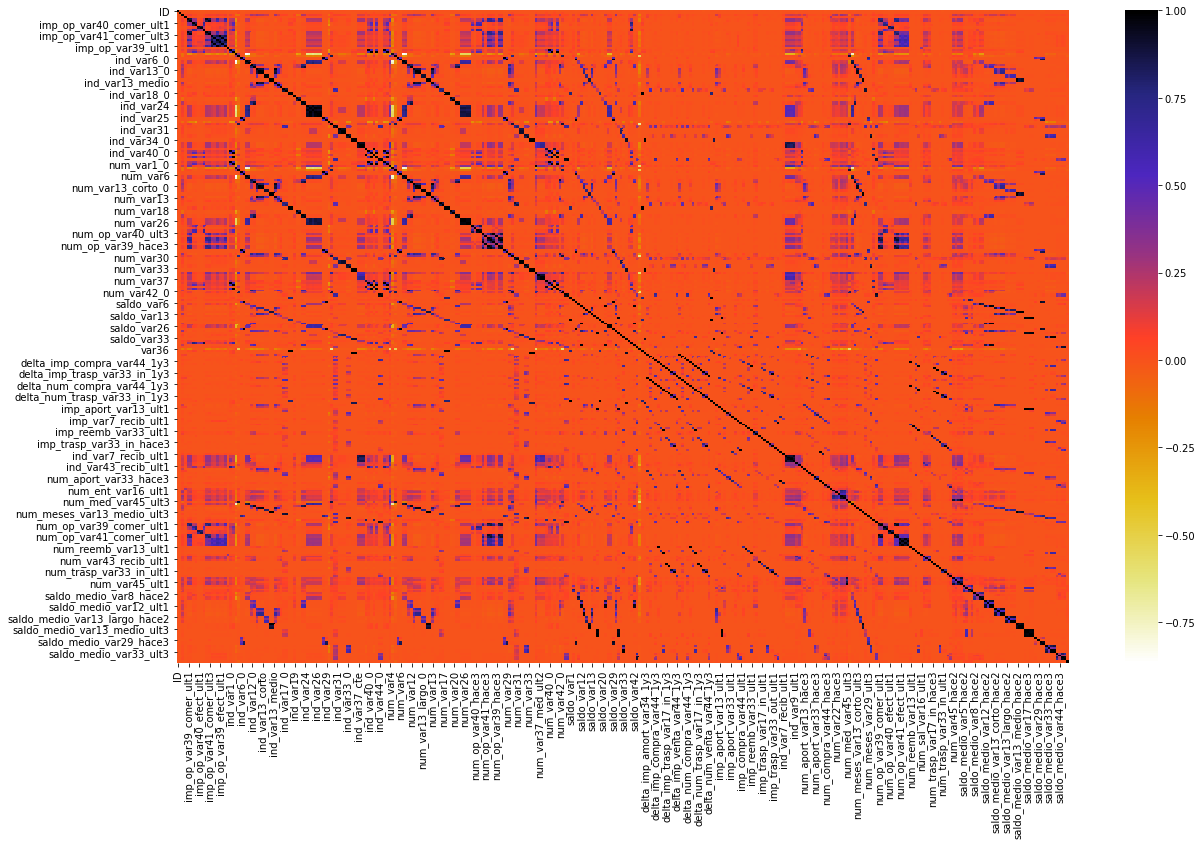

In [12]:
data_corr = x.corr()
plt.figure(figsize=(20,12))
sns.heatmap(data_corr,cmap = plt.cm.CMRmap_r)

In [13]:
def correlation(dataset,threshold):
    col_corr = set()
    cor_matrix = dataset.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j])>threshold :
                col_name = cor_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [14]:
len(correlation(x,0.8))

203

In [15]:
df = santander.drop(correlation(x,0.8),axis=1)

In [16]:
df.shape

(76020, 134)

### Mutual Information Gain for Classification

In [17]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [18]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [44]:
### use train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Wine'],axis=1),df['Wine'],test_size=0.3,random_state=100)

In [45]:
X_train.shape,y_train.shape

((124, 13), (124,))

In [46]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)

In [47]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.columns[1:]

In [48]:
mutual_info.sort_values(ascending=False)

Flavanoids              0.688557
Proline                 0.588417
Color.int               0.551990
Alcohol                 0.494555
OD                      0.440207
Phenols                 0.421251
Hue                     0.334312
Malic.acid              0.329422
Proanth                 0.295046
Mg                      0.219073
Acl                     0.187724
Nonflavanoid.phenols    0.101573
Ash                     0.072831
dtype: float64

In [49]:
from sklearn.feature_selection import SelectKBest

top_5_cols = SelectKBest(mutual_info_classif,k=5)
top_5_cols.fit(X_train,y_train)
X_train.columns[top_5_cols.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')

### Mutual Information Gain for Regression Problem

In [51]:
housing_df = pd.read_csv('./Housing_df.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
numeric_types = ['int16','int32','int64','float16','float32','float64']
numeric_cols = list(housing_df.select_dtypes(include=numeric_types).columns)

In [55]:
housing_df = housing_df[numeric_cols]

In [56]:
housing_df = housing_df.drop(labels=['Id'],axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_df.drop(labels=['SalePrice'],axis=1),housing_df['SalePrice'],test_size=0.3,random_state=100)

In [65]:
from sklearn.feature_selection import mutual_info_regression
mutual_regression = mutual_info_regression(X_train.fillna(0),y_train)
mutual_regression

array([0.30427115, 0.19290066, 0.13183473, 0.57911652, 0.13584648,
       0.38329845, 0.25703277, 0.06489833, 0.1203568 , 0.00265816,
       0.12084092, 0.4088812 , 0.34067567, 0.21546232, 0.00100228,
       0.4997651 , 0.03058492, 0.01720555, 0.2397597 , 0.06056099,
       0.04918659, 0.05287437, 0.1825629 , 0.19651315, 0.2580797 ,
       0.3346214 , 0.341209  , 0.10335663, 0.15960357, 0.03472985,
       0.00415797, 0.0103572 , 0.        , 0.00441663, 0.        ,
       0.        ])

In [69]:
mutual_regression = pd.Series(mutual_regression)
mutual_regression.index = X_train.columns
mutual_regression.sort_values(ascending=False)

OverallQual      0.579117
GrLivArea        0.499765
TotalBsmtSF      0.408881
YearBuilt        0.383298
GarageArea       0.341209
1stFlrSF         0.340676
GarageCars       0.334621
MSSubClass       0.304271
GarageYrBlt      0.258080
YearRemodAdd     0.257033
FullBath         0.239760
2ndFlrSF         0.215462
Fireplaces       0.196513
LotFrontage      0.192901
TotRmsAbvGrd     0.182563
OpenPorchSF      0.159604
OverallCond      0.135846
LotArea          0.131835
BsmtUnfSF        0.120841
BsmtFinSF1       0.120357
WoodDeckSF       0.103357
MasVnrArea       0.064898
HalfBath         0.060561
KitchenAbvGr     0.052874
BedroomAbvGr     0.049187
EnclosedPorch    0.034730
BsmtFullBath     0.030585
BsmtHalfBath     0.017206
ScreenPorch      0.010357
MiscVal          0.004417
3SsnPorch        0.004158
BsmtFinSF2       0.002658
LowQualFinSF     0.001002
MoSold           0.000000
PoolArea         0.000000
YrSold           0.000000
dtype: float64

In [72]:
from sklearn.feature_selection import SelectPercentile
sel_k_percent = SelectPercentile(mutual_info_regression,percentile=20)
sel_k_percent.fit(X_train.fillna(0),y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001C3571A41F0>)

In [73]:
sel_k_percent.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [74]:
X_train.columns[sel_k_percent.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')